## Linear Regression
a = (nΣx y - ΣxΣy) / (nΣx2 - (Σx)2) 

b = (1/n)(Σy - a Σx)

### Machine learning model that can help HR team by detecting the bluff of an candidate regarding the negotiation salary wrt the years of experience.

[Dataset](https://www.kaggle.com/datasets/alenjoseph/salary-data)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

In [4]:
# import dataset
dataset = pd.read_csv('Salary_Data.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values
# dataset.head(3)

In [5]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
# splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [7]:
# model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [8]:
# predicting the test set result
y_pred = regressor.predict(x_test)

In [9]:
acc = regressor.score(x_test,y_test)
print("\n\t\t\t\t\tAccuracy ")
print("\n ",'\033[1m'+"1. Using LinearRegression().score(): "+'\033[0m',round(acc*100,2))
print(" ",'\033[1m'+"2. Using R2 Score: "+'\033[0m',round(r2_score(y_test,y_pred)*100,2))


					Accuracy 

  1. Using LinearRegression().score():  97.49
  2. Using R2 Score:  97.49


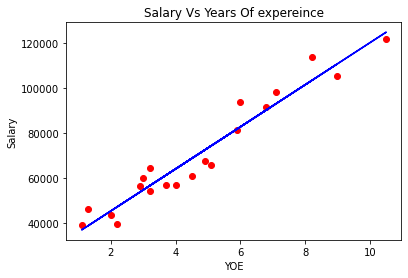

In [10]:
# visualizaing the training set result
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,regressor.predict(x_train), color='blue')
plt.title("Salary Vs Years Of expereince")
plt.xlabel("YOE")
plt.ylabel('Salary')
plt.show()

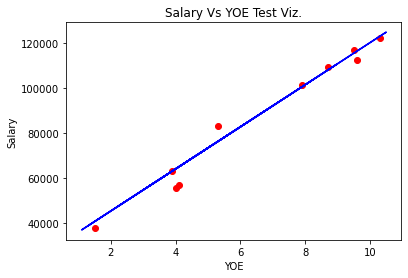

In [11]:
plt.scatter(x_test,y_test, color='red')
plt.plot(x_train,regressor.predict(x_train), color="blue")
plt.title("Salary Vs YOE Test Viz.")
plt.xlabel('YOE')
plt.ylabel('Salary')
plt.show()

In [12]:
def predict_salary(years_experience):
    return round(regressor.predict([[years_experience]])[0],2)

In [13]:
experience = float(input("Enter your experience: "))
print("Approx. Salary: ",predict_salary(experience))

Enter your experience: 5
Approx. Salary:  73545.9


## Multiple Linear Regression

This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

_[dataset](https://www.kaggle.com/datasets/farhanmd29/50-startups)_

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# importing dataset
dataset = pd.read_csv('50_Startups.csv')
dataset.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [3]:
# # separating out x and y
# x = dataset.iloc[:,:4].values
# y = dataset.iloc[:,4:5].values

In [4]:
# from sklearn.compose import ColumnTransformer
# import numpy as np
# from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
# x = np.array(ct.fit_transform(x))

In [5]:
# # splitting out dataset into train and test
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [6]:
# # avoid 1st column
# x = x[:,1:]

In [7]:
# regressor = LinearRegression()
# regressor.fit(x_train,y_train)

In [8]:
# y_pred = regressor.predict(x_test)
# # y_pred

In [9]:
# acc = regressor.score(x_test,y_test)
# print("\n\t\t\t\t\tAccuracy ")
# print("\n ",'\033[1m'+"1. Using LinearRegression().score(): "+'\033[0m',round(acc*100,2))
# print(" ",'\033[1m'+"2. Using R2 Score: "+'\033[0m',round(r2_score(y_test,y_pred)*100,2))

##### model-2

In [10]:
dummies = pd.get_dummies(dataset.State) #type of OHE
dataset1 = pd.concat([dataset,dummies],axis='columns')
dataset1.drop(columns=['State'],inplace=True)
dataset1.head(3)

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0


In [11]:
x = dataset1.drop("Profit",axis='columns')
y = dataset1['Profit']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [16]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred

array([ 89173.72784099, 110171.90144925,  65822.47758052,  70785.21142577,
        47652.12694016, 116303.59665194, 172176.28003542, 100657.06254099,
       160473.2526588 , 158835.6224623 ])

In [17]:
acc = regressor.score(x_test,y_test)
print("\n\t\t\t\t\tAccuracy ")
print("\n ",'\033[1m'+"1. Using LinearRegression().score(): "+'\033[0m',round(acc*100,2))
print(" ",'\033[1m'+"2. Using R2 Score: "+'\033[0m',round(r2_score(y_test,y_pred)*100,2))


					Accuracy 

  1. Using LinearRegression().score():  99.01
  2. Using R2 Score:  99.01


In [23]:
def predict_profit(state,rnd_spend,admin_spend,marketing_spend):
    loc_index = np.where(x.columns==state)[0][0]

    X = np.zeros(len(x.columns))
    
    X[0] = rnd_spend
    X[1] = admin_spend
    X[2] = marketing_spend
    X[loc_index] = 1

    return round(regressor.predict([X])[0],2)

In [25]:
print("\n\t\t\t\t\t Startup Profit Prediction")
print("\n\nEnter Following Spends")

print("\n1 -> California\n2 -> Florida\n3 -> New York")

choice = int(input("\nEnter State: "))

if choice==1:
    state = "California"
elif choice==2:
    state = "Florida"
else:
    state = "New York"
    
rnd_spend = float(input("R&D Spend: "))
admin_spend = float(input("Administration: "))
marketing_spend = float(input("Marketing "))

print("-------------------------------------------------------------------------")
print('\033[1m'+"\t\t\t\t","EXPECTED PROFIT: ",predict_profit(state,rnd_spend,admin_spend,marketing_spend),'\033[0m')
print("-------------------------------------------------------------------------")


					 Startup Profit Prediction


Enter Following Spends

1 -> California
2 -> Florida
3 -> New York


Enter State: 1

R&D Spend: 44069.95
Administration: 51283.14
Marketing 197029.42
-------------------------------------------------------------------------
				 EXPECTED PROFIT:  89173.73 
-------------------------------------------------------------------------


# Logistic Regression Model

**For this section we will use *'Social_Network_Ads.csv'* dataset. Which represents sell of car accroding to 'age' and 'salary'.**

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [43]:
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [44]:
# splitting data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
# Feature Scalling
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [10]:
# Algorithm Implementation
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [11]:
lr.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

## model-2

In [4]:
from sklearn.pipeline import Pipeline

In [5]:
x = dataset[['Age','EstimatedSalary']]
y = dataset['Purchased']

In [6]:
# splitting data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
# define pipeline
steps = [('standard_scaler',StandardScaler()),
        ('lr',LogisticRegression(random_state=0))]

pipe = Pipeline(steps)

In [8]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('lr', LogisticRegression(random_state=0))])

In [9]:
# Algorithm Implementation
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [10]:
def predict(age,salary):
    return pipe.predict([[age,salary]])[0]

In [16]:
age = int(input("Enter Age: "))
salary = int(input("Enter Salary: "))

if predict(age,salary):
    print("Will Probably BUY")
else:
    print("Will NOT BUY")

Enter Age: 45
Enter Salary: 20000
Will NOT BUY


# Polynomial Regression

### Machine learning model that can help HR team by detecting the bluff of an candidate regarding the negotiation salary wrt the years of experience.

[Dataset](https://www.kaggle.com/datasets/alenjoseph/salary-data)

In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [3]:
# import dataset
dataset = pd.read_csv('Salary_Data.csv')

In [4]:
x = dataset.drop(columns=['Salary'])
y = dataset.drop(columns=['YearsExperience'])

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [7]:
poly = PolynomialFeatures(degree=2,include_bias=True)
x_trained_transformed = poly.fit_transform(x_train)
x_test_transfromed = poly.fit_transform(x_test)

# include bias parameter.
lr = LinearRegression()
lr.fit(x_trained_transformed, y_train)

LinearRegression()

In [11]:
y_predicted = lr.predict(x_test_transfromed)

In [13]:
print(r2_score(y_test,y_predicted))

0.9882197351491802


In [21]:
lr.predict(poly.fit_transform([[2]]))

array([[45463.51458039]])

In [23]:
steps = [('poly',PolynomialFeatures(degree=2,include_bias=True)),
                  ("lr",LinearRegression())]

In [24]:
pipe = Pipeline(steps)

In [25]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('lr', LinearRegression())])

In [26]:
def predict(experience):
    return pipe.predict([[experience]])

In [37]:
experience = float(input("Enter experience: "))
print("\n---------------------------------------------------------")
print('\033[1m'+"\t\tApproximate Salary: ",round(predict(experience)[0][0],2))
print("---------------------------------------------------------")

Enter experience: 2

---------------------------------------------------------
		Approximate Salary:  45463.51
---------------------------------------------------------
